In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('E:/rahul/processed_data/North_india.csv',index_col=[0])
data

,BT_6V,BT_6H,BT_10V,BT_10H,BT_18V,BT_18H,BT_36V,BT_36H,BT_89V,BT_89H,MODIS_LST,SM,VegWater,PR6,PR10,PR18,PR36,PR89
0,294.3,284.2,296.1,289.9,296.6,290.8,294.0,289.5,296.7,293.7,302.588470,0.119,0.58,0.965681,0.979061,0.980445,0.984694,0.989889
1,294.4,283.7,296.4,290.4,296.4,290.7,293.9,289.5,296.7,294.1,302.652222,0.123,0.60,0.963655,0.979757,0.980769,0.985029,0.991237
2,293.9,282.4,295.6,288.8,295.5,289.7,293.3,288.7,296.6,293.6,302.995850,0.124,1.04,0.960871,0.976996,0.980372,0.984316,0.989885
3,290.1,278.3,287.7,279.5,288.9,281.6,287.4,281.4,291.1,282.4,304.360992,0.132,0.79,0.959324,0.971498,0.974732,0.979123,0.970113
4,293.9,283.4,296.1,290.1,296.4,290.5,293.8,289.2,296.7,294.1,303.639160,0.121,0.29,0.964274,0.979737,0.980094,0.984343,0.991237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27479,309.7,271.4,309.2,264.7,310.5,277.9,308.0,281.8,303.8,297.6,318.672638,0.091,1.25,0.876332,0.856080,0.895008,0.914935,0.979592
27480,311.3,285.3,309.4,266.0,310.6,279.0,307.9,282.8,304.3,298.1,319.162415,0.087,1.31,0.916479,0.859729,0.898261,0.918480,0.979625
27481,309.2,281.3,307.1,270.9,308.6,283.4,306.1,286.6,302.5,298.0,319.294952,0.071,1.71,0.909767,0.882123,0.918341,0.936295,0.985124
27482,307.3,272.6,306.5,271.3,308.1,284.1,305.9,287.7,302.6,297.9,318.885254,0.079,1.84,0.887081,0.885155,0.922103,0.940503,0.984468


In [3]:
data['(36V-18V)^2']=(data['BT_36V']-data['BT_18V'])**2

In [4]:
# correlation matrix
correlation_matrix=data.corr()
correlation_matrix

,BT_6V,BT_6H,BT_10V,BT_10H,BT_18V,BT_18H,BT_36V,BT_36H,BT_89V,BT_89H,MODIS_LST,SM,VegWater,PR6,PR10,PR18,PR36,PR89,(36V-18V)^2
BT_6V,1.000000,0.351820,0.939070,0.314620,0.934619,0.417474,0.915667,0.513505,0.819616,0.716236,0.650189,-0.505094,-0.359465,-0.269787,-0.287453,-0.310476,-0.278152,-0.242059,0.115605
BT_6H,0.351820,1.000000,0.203051,0.926600,0.137061,0.897582,0.072968,0.847038,-0.012062,0.525538,-0.042679,0.171862,0.404559,0.805312,0.761231,0.734800,0.735583,0.622755,0.130907
BT_10V,0.939070,0.203051,1.000000,0.259712,0.987380,0.367600,0.976862,0.478704,0.887209,0.725878,0.714389,-0.556121,-0.407993,-0.381559,-0.379682,-0.397567,-0.362731,-0.319682,0.089452
BT_10H,0.314620,0.926600,0.259712,1.000000,0.184858,0.976284,0.118413,0.934518,0.021609,0.589612,-0.007990,0.136756,0.415531,0.756328,0.793729,0.770155,0.777790,0.651639,0.160647
BT_18V,0.934619,0.137061,0.987380,0.184858,1.000000,0.304934,0.995168,0.421639,0.915113,0.700864,0.744948,-0.602138,-0.475536,-0.447996,-0.444353,-0.466229,-0.432176,-0.384932,0.093076
BT_18H,0.417474,0.897582,0.367600,0.976284,0.304934,1.000000,0.239462,0.985500,0.129819,0.705857,0.069826,0.059518,0.414757,0.658992,0.700440,0.699533,0.722376,0.643179,0.208287
BT_36V,0.915667,0.072968,0.976862,0.118413,0.995168,0.239462,1.000000,0.361661,0.938228,0.676787,0.765091,-0.611355,-0.515307,-0.502931,-0.502238,-0.524295,-0.493024,-0.443038,0.040376
BT_36H,0.513505,0.847038,0.478704,0.934518,0.421639,0.985500,0.361661,1.000000,0.252815,0.785369,0.182989,-0.014633,0.345009,0.544269,0.588242,0.596229,0.632143,0.573174,0.215805
BT_89V,0.819616,-0.012062,0.887209,0.021609,0.915113,0.129819,0.938228,0.252815,1.000000,0.672686,0.794242,-0.552466,-0.551737,-0.536260,-0.544554,-0.571010,-0.547459,-0.529622,-0.038502
BT_89H,0.716236,0.525538,0.725878,0.589612,0.700864,0.705857,0.676787,0.785369,0.672686,1.000000,0.449765,-0.236485,0.069908,0.079279,0.097015,0.122137,0.165449,0.271125,0.117842


In [5]:
y0=data['MODIS_LST']
x0=data[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]
# x0=data.drop(['MODIS_LST','SM','VegWater'],axis='columns')
X_train, X_test, Y_train, Y_test = train_test_split(x0, y0, test_size=0.30, random_state=42)

In [6]:
sc_X=StandardScaler()  
sc_Y=StandardScaler()  
X_train_sc=sc_X.fit_transform(X_train)
Y_train=np.array(Y_train).reshape(-1,1)
Y_train_sc=sc_Y.fit_transform(Y_train)

# LinearRegression

In [7]:
reg = LinearRegression().fit(X_train_sc, Y_train_sc)
Y_pred=sc_Y.inverse_transform(reg.predict(sc_X.transform(X_test)))
print("R2-: ",reg.score(sc_X.fit_transform(X_test),sc_Y.fit_transform(np.array(Y_test).reshape(-1,1))))
print("coeff: ", reg.coef_)
print("intercept: ",reg.intercept_)

R2-:  0.7318967561845581
coeff:  [[-0.2366004   0.23277814 -0.75295014  1.26325334  0.19030677 -4.00761317
   0.91704498  2.91168796  0.62550616 -0.35371956  0.14373252]]
intercept:  [-6.08675232e-15]


In [8]:
RMSE=np.round(mean_squared_error(Y_test,Y_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

error=Y_test-Y_pred.reshape(-1)


RMSE:  3.676 K


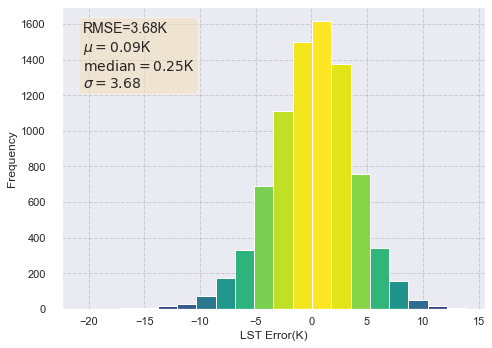

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
  
  
N_points = 10000
n_bins = 20
  
# Creating distribution
legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2fK' % (RMSE, ),
    r'$\mu=%.2f$K' % (mu, ),
    r'$\mathrm{median}=%.2f$K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("LST Error(K)")
plt.ylabel("Frequency")
# plt.legend(legend)
# plt.title('Error in Predicted LST -Linear Regression')
plt.show()

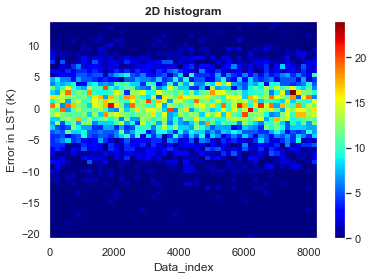

In [10]:
plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram', fontweight ="bold")
plt.show()

# PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=3, svd_solver='full')
l=pca.fit_transform(x0)
print(pca.explained_variance_ratio_)

[0.61848699 0.32331197 0.0276792 ]


# Support vector regression

In [13]:
regressor=SVR(C=100, gamma=0.1,kernel='rbf')
regressor.fit(X_train_sc,Y_train_sc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100, gamma=0.1)

In [14]:
Y_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
print("R-Square: ",r2_score(Y_test,Y_pred))

df=pd.DataFrame({})
df['MOD_LST']=Y_test
df['pred_LST']=Y_pred
df['Error']=Y_test-Y_pred
df.describe()

R-Square:  0.8296802045503995


,MOD_LST,pred_LST,Error
count,8246.000000,8246.000000,8246.000000
mean,318.091121,318.311588,-0.220467
std,7.100133,6.598807,2.921905
min,271.113190,264.038754,-13.891037
25%,313.718102,314.326305,-1.928806
50%,318.919998,319.352045,-0.068516
75%,323.003670,322.797364,1.605282
max,339.174805,337.103478,12.823594


In [15]:
RMSE=np.round(mean_squared_error(Y_test,Y_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

error=Y_test-Y_pred.reshape(-1)

RMSE:  2.93 K


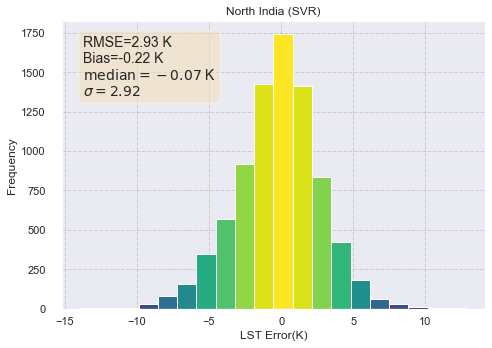

In [16]:

N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2f K' % (RMSE, ),
    r'Bias=%.2f K' % (mu, ),
    r'$\mathrm{median}=%.2f$ K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("LST Error(K)")
plt.ylabel("Frequency")
# plt.legend(legend)
plt.title('North India (SVR)')
plt.savefig(r'E:\North India (SVR).jpeg',dpi=400)
plt.show()


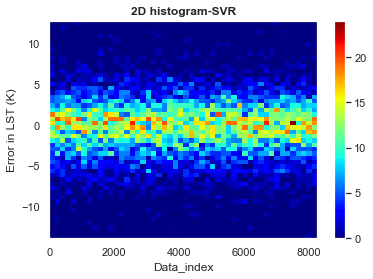

In [17]:
plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
plt.show()

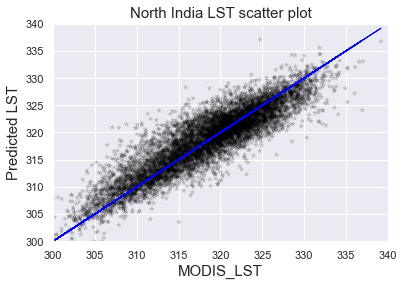

In [19]:
plt.scatter(Y_test,Y_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("North India LST scatter plot",fontsize=15)
plt.ylabel("Predicted LST",fontsize=15)
plt.xlabel("MODIS_LST",fontsize=15)
plt.xlim(300,340)
plt.ylim(300,340)
plt.plot(Y_test,Y_test,c='blue',lw=1)
plt.savefig(r'E:\North India LST scatter plot.jpeg',dpi=400)
plt.show()


# Testing over central india using North india algorithm

In [20]:
d=pd.read_csv('E:/rahul/processed_data/Central_india.csv',index_col=[0])
d['(36V-18V)^2']=(d['BT_36V']-d['BT_18V'])**2

d_y0=d['MODIS_LST']
d_x0=d[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]

dY_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(d_x0)))
print("R-Square: ",r2_score(d_y0,dY_pred))

df=pd.DataFrame({})
df['MOD_LST']=d_y0
df['pred_LST']=dY_pred
df['Error']=d_y0-dY_pred
df.describe()

R-Square:  -0.22730507207448514


,MOD_LST,pred_LST,Error
count,12922.000000,12922.000000,12922.000000
mean,321.865103,319.399764,2.465339
std,4.543312,3.344194,4.388084
min,305.191925,291.712084,-23.500362
25%,318.748138,317.322112,-0.276515
50%,322.008713,319.572061,2.308252
75%,325.203461,321.626632,4.912848
max,334.007965,339.016691,34.126875


RMSE:  5.033 K


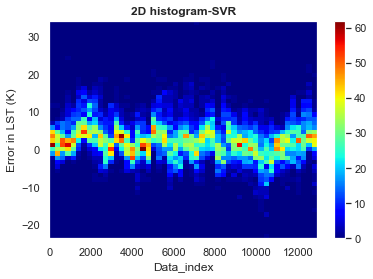

In [21]:
error=df['Error']
RMSE=np.round(mean_squared_error(d_y0,dY_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
plt.show()

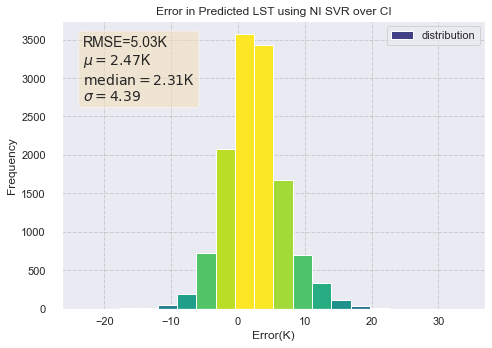

In [22]:

N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2fK' % (RMSE, ),
    r'$\mu=%.2f$K' % (mu, ),
    r'$\mathrm{median}=%.2f$K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("Error(K)")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Error in Predicted LST using NI SVR over CI')
plt.show()

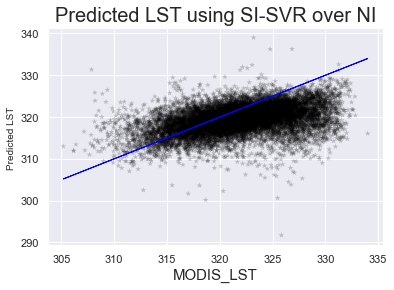

In [23]:
plt.scatter(d_y0,dY_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("Predicted LST using SI-SVR over NI",fontsize=20)
plt.ylabel("Predicted LST ",fontsize=10)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(d_y0,d_y0,c='blue',lw=1)
plt.show()

# South india data for testing

In [24]:
d=pd.read_csv('E:/rahul/processed_data/South_india.csv',index_col=[0])
d['(36V-18V)^2']=(d['BT_36V']-d['BT_18V'])**2

d_y0=d['MODIS_LST']
d_x0=d[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]

dY_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(d_x0)))
print("R-Square: ",r2_score(d_y0,dY_pred))

df=pd.DataFrame({})
df['MOD_LST']=d_y0
df['pred_LST']=dY_pred
df['Error']=d_y0-dY_pred
df.describe()

R-Square:  -0.36899077611871833


,MOD_LST,pred_LST,Error
count,13008.000000,13008.000000,13008.000000
mean,319.269055,314.083315,5.185740
std,5.276059,4.594428,3.348782
min,297.974426,291.137657,-12.782745
25%,315.767387,310.618449,3.183318
50%,319.299347,314.220323,5.361140
75%,323.105225,317.731395,7.328284
max,334.068787,329.044117,34.627754


RMSE:  6.173 K


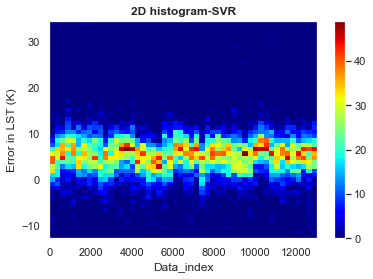

In [25]:
error=df['Error']
RMSE=np.round(mean_squared_error(d_y0,dY_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
plt.show()

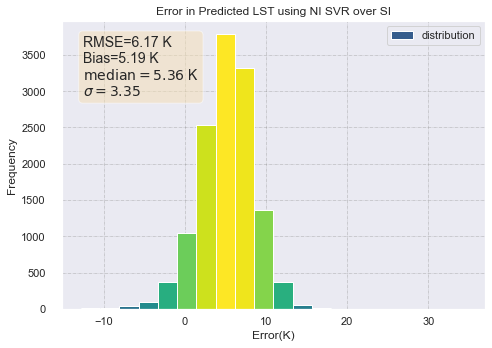

In [26]:
N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2f K' % (RMSE, ),
    r'Bias=%.2f K' % (mu, ),
    r'$\mathrm{median}=%.2f$ K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("Error(K)")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Error in Predicted LST using NI SVR over SI')
plt.show()

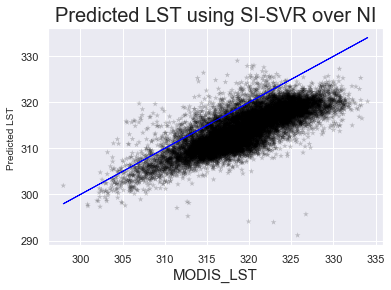

In [27]:
plt.scatter(d_y0,dY_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("Predicted LST using SI-SVR over NI",fontsize=20)
plt.ylabel("Predicted LST ",fontsize=10)
plt.xlabel("MODIS_LST",fontsize=15)
plt.plot(d_y0,d_y0,c='blue',lw=1)
plt.show()

# Testing over NORTH INDIA but Year 2007

In [28]:
d=pd.read_csv(r'E:\rahul\processed_data\MAY_2007\North_india.csv',index_col=[0])
d['(36V-18V)^2']=(d['BT_36V']-d['BT_18V'])**2

d_y0=d['MODIS_LST']
d_x0=d[["BT_6V","BT_6H","BT_10V","BT_10H","BT_18V","BT_18H","BT_36V","BT_36H","BT_89V","BT_89H","(36V-18V)^2"]]

dY_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(d_x0)))
print("R-Square: ",r2_score(d_y0,dY_pred))

df=pd.DataFrame({})
df['MOD_LST']=d_y0
df['pred_LST']=dY_pred
df['Error']=d_y0-dY_pred
df.describe()

R-Square:  0.7316682234906243


,MOD_LST,pred_LST,Error
count,3291.000000,3291.000000,3291.000000
mean,322.115049,319.438128,2.676921
std,8.312849,7.156776,3.372621
min,280.331238,270.969357,-9.048917
25%,316.855438,315.581498,0.384832
50%,323.313934,321.259145,2.569556
75%,328.356628,324.412397,4.914145
max,339.191284,333.069760,17.436466


RMSE:  4.305 K


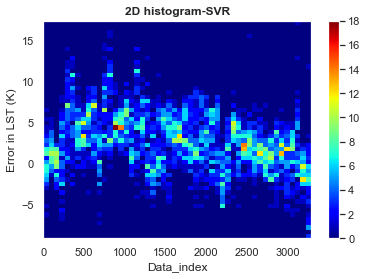

In [29]:
error=df['Error']
RMSE=np.round(mean_squared_error(d_y0,dY_pred,squared=False),decimals=3)
print("RMSE: ",RMSE,"K")

plt.hist2d(np.arange(0,len(error)),error, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("Data_index")
plt.ylabel("Error in LST (K)")
plt.title('2D histogram-SVR', fontweight ="bold")
plt.show()

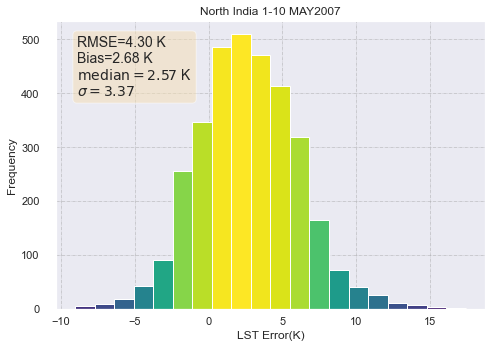

In [30]:
N_points = 10000
n_bins = 20
  
# # Creating distribution
# legend = ['distribution']
  
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(7,5), 
                        tight_layout = True)
  
axs.xaxis.set_tick_params(pad = 2) 
axs.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 
  
mu = error.mean()
median = np.median(error)
sigma = error.std()

textstr = '\n'.join((r'RMSE=%.2f K' % (RMSE, ),
    r'Bias=%.2f K' % (mu, ),
    r'$\mathrm{median}=%.2f$ K' % (median, ),
    r'$\sigma=%.2f$' % (sigma, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Creating histogram
N, bins, patches = axs.hist(error, bins = n_bins)
  
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
  
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
  
plt.xlabel("LST Error(K)")
plt.ylabel("Frequency")
# plt.legend(legend)
plt.title('North India 1-10 MAY2007')
plt.savefig(r'E:\North India 1-10 MAY2007.jpeg',dpi=400)
plt.show()


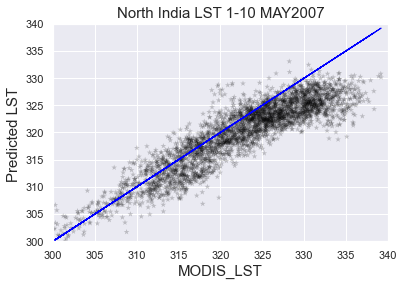

In [31]:
plt.scatter(d_y0,dY_pred,c='Black',marker='*',alpha=0.2,edgecolors='none')
plt.title("North India LST 1-10 MAY2007",fontsize=15)
plt.ylabel("Predicted LST ",fontsize=15)
plt.xlabel("MODIS_LST",fontsize=15)
plt.xlim(300,340)
plt.ylim(300,340)
plt.plot(d_y0,d_y0,c='blue',lw=1)
plt.savefig(r'E:\North India LST 1-10 MAY2007.jpeg',dpi=400)
plt.show()
